In [6]:


import pandas as pd
from helm.benchmark.runner import InstanceGenerations,GenerationSummary
from typing import Any, List
import json
from helm.common.request import (GeneratedOutput, Token)

import PostMetric
import pandas as pd

from helm.benchmark.metrics.statistic import Stat
from typing import Dict, Optional

from helm.benchmark.augmentations.perturbation_description import (
    PerturbationDescription)
from dataclasses import dataclass
from process_gens import *
from process_gen_utils import *



processGens=ProcessGens()

#wmt modes

process_gen_modes=["olmo_template", "llama_template", "wmt_samples0", "wmt_samples2_1", "wmt_samples2_2"]



processGens.init_with_mode(process_gen_modes)
root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics, compare_metric = processGens.get_params()
examples_df, completions_df=get_dfs(processGens)




Init: process_gens_mode ['olmo_template', 'llama_template', 'wmt_samples0', 'wmt_samples2_1', 'wmt_samples2_2']
calculate_gen_summary_dict
snellius_copies/helm_output/sample_100_eval_500_first_inst_0_template_true/wmt_14_language_pair_de_en_/allenai_OLMo_2_1124_13B_Instruct/1_beams/runs/sample_100_eval_500_first_inst_0_template_true
get_metrics_dict
calculate_gen_summary_dict
snellius_copies/helm_output/llama_template/wmt_14_language_pair_de_en_/meta_llama_Llama_3.1_8B_Instruct/1_beams/runs/llama_template
get_metrics_dict
calculate_gen_summary_dict
snellius_copies/helm_output/sample_100_eval_1000/wmt_14_language_pair_de_en_/meta_llama_Llama_3.1_8B_Instruct/1_beams/runs/sample_100_eval_1000
get_metrics_dict
calculate_gen_summary_dict
snellius_copies/helm_output/sample_100_eval_100_first_inst_0/wmt_14_language_pair_de_en_/allenai_OLMo_2_1124_7B_Instruct/1_beams/runs/sample_100_eval_100_first_inst_0
snellius_copies/helm_output/sample_100_eval_100_first_inst_0/wmt_14_language_pair_de_en_/a

In [15]:

dfs_by_model={}

# llama_template
# sample_100_eval_500_first_inst_0_template_true
for model_name in examples_df['model'].unique():

    filtered_df = examples_df[examples_df["model"]==model_name]

    is_template=filtered_df['suite'].str.contains("template")
    template_df = filtered_df[is_template]
    no_template_df = filtered_df[~is_template]

    dfs_by_model[model_name]=no_template_df
    dfs_by_model[model_name+"_template"]=template_df

all_dfs_by_model=dfs_by_model
print("dict_keys ",dfs_by_model.keys())



model_name allenai_OLMo_2_1124_13B_Instruct
len(template_df) 50000
len(no_template_df) 50000


model_name meta_llama_Llama_3.1_8B_Instruct
len(template_df) 50000
len(no_template_df) 100000


model_name allenai_OLMo_2_1124_7B_Instruct
len(template_df) 0
len(no_template_df) 50000
dict_keys  dict_keys(['allenai_OLMo_2_1124_13B_Instruct', 'allenai_OLMo_2_1124_13B_Instruct_template', 'meta_llama_Llama_3.1_8B_Instruct', 'meta_llama_Llama_3.1_8B_Instruct_template', 'allenai_OLMo_2_1124_7B_Instruct', 'allenai_OLMo_2_1124_7B_Instruct_template'])


In [27]:
no_templates=[ "meta_llama_Llama_3.1_8B_Instruct", "allenai_OLMo_2_1124_13B_Instruct"]
templates=[model_name+"_template" for model_name in no_templates]

models_array=[no_templates, templates]

In [23]:


def get_model_details(model_name):


    info_dict={
        #olmo
        "allenai_OLMo_2_0425_1B_Instruct":{"size": 1, "suite":  "olmo","model_type":"instruct", "name":"Olmo 1B Instruct"},
        "allenai_OLMo_2_0425_1B":{"size": 1, "suite":  "olmo","model_type":"base", "name":"Olmo 1B Base"},

        "allenai_OLMo_2_1124_7B_Instruct":{"size": 7, "suite":  "olmo","model_type":"instruct", "name":"Olmo 7B Instruct" },
        "allenai_OLMo_2_1124_7B":{"size": 7, "suite":  "olmo","model_type":"base", "name":"Olmo 7B Base" },

        "allenai_OLMo_2_1124_13B_Instruct":{"size": 13, "suite":  "olmo","model_type":"instruct", "name":"Olmo 13B Instruct" },
        "allenai_OLMo_2_1124_13B":{"size": 13, "suite":  "olmo","model_type":"base", "name":"Olmo 13B Base" },

        #llama instruct
        "meta_llama_Llama_3.2_1B_Instruct":{"size": 1, "suite": "llama","model_type":"instruct",  "name":"Llama 1B Instruct"},
        "meta_llama_Llama_3.2_1B":{"size": 1, "suite": "llama","model_type":"base",  "name":"Llama 1B Base"},

        "meta_llama_Llama_3.1_8B_Instruct":{"size": 8, "suite": "llama","model_type":"instruct",  "name":"Llama 8B Instruct"},
        "meta_llama_Llama_3.1_8B":{"size": 8, "suite": "llama","model_type":"base",  "name":"Llama 8B Base"},

        
        "meta-llama/Meta-Llama-3-70B-Instruct":{"size": 70, "suite": "llama","model_type":"instruct",  "name":"Llama 70B Instruct"},
        "allenai/OLMo-2-0325-32B-Instruct":{"size": 32, "suite": "olmo","model_type":"base",  "name":"Olmo 32 Base"},
        
        # #compare types
        "allenai_OLMo_2_1124_7B_DPO":{"size": 7, "suite":  "olmo","model_type":"dpo", "name":"Olmo 7B DPO" },
        "allenai_OLMo_2_1124_7B_SFT":{"size": 7, "suite":  "olmo","model_type":"sft", "name":"Olmo 7B SFT" },

        "allenai_OLMo_2_1124_13B_DPO":{"size": 13, "suite":  "olmo","model_type":"dpo", "name":"Olmo 13B DPO" },
        "allenai_OLMo_2_1124_13B_SFT":{"size": 13, "suite":  "olmo","model_type":"sft", "name":"Olmo 13B SFT" },

        "allenai_OLMo_2_1124_13B_DPO":{"size": 13, "suite":  "olmo","model_type":"dpo", "name":"Olmo 13B DPO" },
        "allenai_OLMo_2_1124_13B_SFT":{"size": 13, "suite":  "olmo","model_type":"sft", "name":"Olmo 13B SFT" },

        "Qwen_Qwen3_0.6B":{"size": 0.6, "suite":  "qwen","model_type":"base", "name":"Qwen 0.6B" },
        "Qwen_Qwen3_1.7B":{"size": 1.7, "suite":  "qwen","model_type":"base", "name":"Qwen 1.7B" },
        "Qwen_Qwen3_4B":{"size": 4, "suite":  "qwen","model_type":"base", "name":"Qwen 4B" },
        "Qwen_Qwen3_8B":{"size": 8, "suite":  "qwen","model_type":"base", "name":"Qwen 8B" },
        "Qwen_Qwen3_32B":{"size": 32, "suite":  "qwen","model_type":"base", "name":"Qwen 32B" },

        "meta_llama_Llama_3.1_8B_Instruct_template":{"size": 8, "suite": "llama","model_type":"instruct",  "name":"Llama 8B Instruct Template"},
        "allenai_OLMo_2_1124_13B_Instruct_template":{"size": 13, "suite":  "olmo","model_type":"instruct", "name":"Olmo 13B Instruct Template" },
        
    }
    
    for new_name, dict_name in [ ("Qwen/Qwen3-0.6B","Qwen_Qwen3_0.6B"),
        ("Qwen/Qwen3-1.7B","Qwen_Qwen3_1.7B"),
        ("Qwen/Qwen3-4B","Qwen_Qwen3_4B"),
        ("Qwen/Qwen3-8B","Qwen_Qwen3_8B"),
        ("Qwen/Qwen3-32B","Qwen_Qwen3_32B")]:
        info_dict[new_name] = info_dict[dict_name] 

    
    return info_dict[model_name]

figsize is (10, 10)
model_name is meta_llama_Llama_3.1_8B_Instruct
model_name is allenai_OLMo_2_1124_13B_Instruct
model_name is meta_llama_Llama_3.1_8B_Instruct_template
model_name is allenai_OLMo_2_1124_13B_Instruct_template


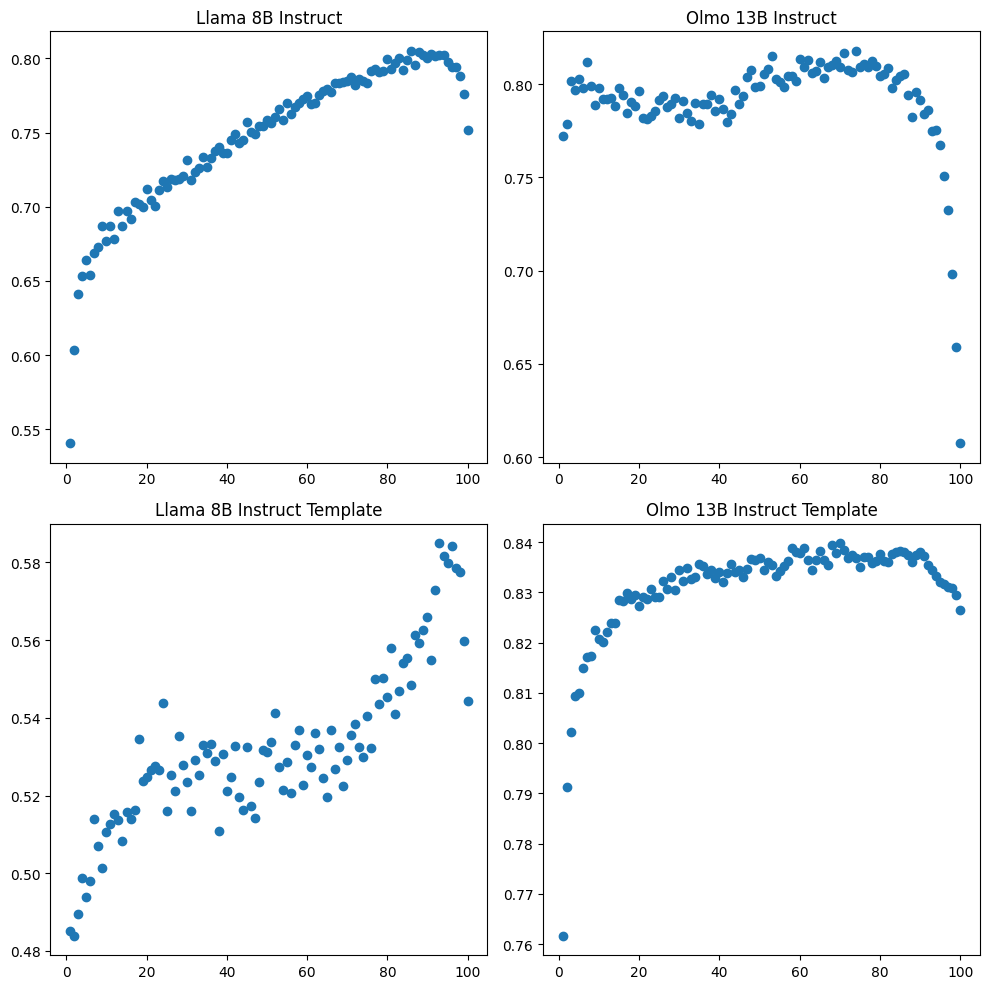

In [28]:
def qualitative_plots(models_array, dfs_by_model, compare_metric, figsize=None):
    

    nrows=len(models_array)
    ncols=max(len(s) for s in models_array)

    if figsize is None:
        figsize=(nrows*5, ncols*5)
        print(f"figsize is {figsize}")
    _, axes=plt.subplots(nrows=nrows, ncols= ncols, figsize=figsize)
    
    for row, suite_models in enumerate(models_array):
        for col in range(ncols):
            ax=axes[row][col]
            if col < len(suite_models):
                model_name=suite_models[col]
                print(f"model_name is {model_name}")

                filtered_df=dfs_by_model[model_name]
                def calculate_title():
                    readable_model=get_model_details(model_name)['name']
                    return f"{readable_model}: {suptitle}" if ax is None else readable_model
                # plot by rank within sentence
                suptitle="Grouped by rank within sentence"
                ax=plot_grouped(df=filtered_df, xlabel="rank",groupby='example_idx', ylabel=compare_metric, title=calculate_title(), ax=ax, error_bar=False)  
                ax.set_xlabel(None)
                ax.set_ylabel(None)
            else:
                ax.axis('off')
    plt.tight_layout()


qualitative_plots(models_array=models_array, dfs_by_model=dfs_by_model, compare_metric=compare_metric)